In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [94]:
# mute some error warnings from sklearn
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [95]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [124]:
all_stocks_sets = {
    # future interval: data set
    10: load_data_set("all_stocks_20spy_10shift_normalized"),
    20: load_data_set("all_stocks_20spy_20shift_normalized"),
    50: load_data_set("all_stocks_20spy_50shift_normalized"),
    100: load_data_set("all_stocks_20spy_100shift_normalized")
}

In [133]:
# choose a data set
samples = all_stocks_sets[10]

# calculate the correlations for a data set
correlations = samples.corrwith(np.log(samples["future_price"]))

# filter out the future columns
future_columns = [column for column in samples if "future" in column]
correlations.drop(future_columns, inplace=True)
correlations.drop("current_price", inplace=True)
correlations.drop("index", inplace=True)

# show the correlations
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:,.3f}'.format
pd.DataFrame(correlations.sort_values(key=pd.Series.abs, ascending=False))

,0
sma20,0.076
ema10,0.076
lwma20,0.076
ema20,0.076
sma10,0.075
lwma10,0.075
regression_upper20,0.075
ema50,0.067
rate_of_change20,-0.062
sma50,0.061


In [116]:
def plot_correlations(interval, correlations, plot_columns=2):
    number_of_indicators = len(correlations)
    fig, axs = plt.subplots(number_of_indicators // plot_columns + number_of_indicators % plot_columns, plot_columns, figsize=(30,60))
    fig.text(0.5, 0.04, "prediction interval", ha="center")
    fig.text(0.04, 0.5, "correlation", va="center", rotation="vertical")
    for index, indicator in enumerate(correlations):
        axs[index // plot_columns][index % plot_columns].title.set_text(indicator)
        axs[index // plot_columns][index % plot_columns].plot(intervals, correlations[indicator])
    
    plt.subplots_adjust(top=5)
    plt.show()

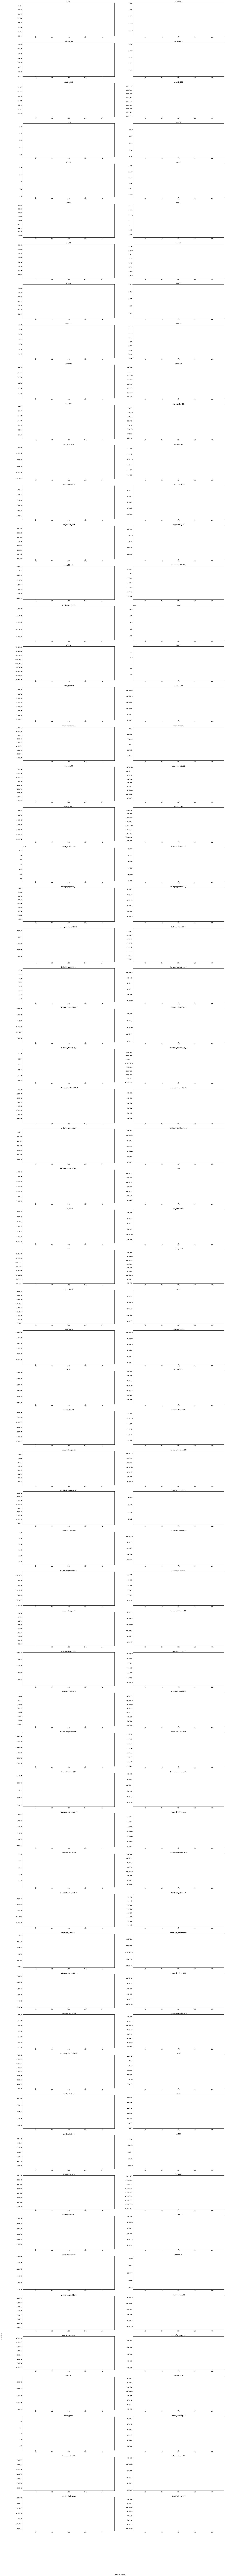

In [6]:
def analyze_indicator_correlation(sample_sets, future_indicator):
    correlations = dict.fromkeys(list(sample_sets.values())[0], np.array([]))
    for interval in sample_sets:
        future = sample_sets[interval][future_indicator]
        for feature_name, feature_values in sample_sets[interval].iteritems():
            corr = feature_values.corr(future)
            correlations[feature_name] = np.append(correlations[feature_name], corr)
    
    return correlations

intervals = list(all_stocks_sets.keys())
correlations = analyze_indicator_correlation(all_stocks_sets, "future_price")
plot_correlations(intervals, correlations)

In [127]:
def f_test_selection(samples, number_of_features):
    # define the select using the f_test 
    selector = SelectKBest(f_regression)
    
    # select the wanted columns
    features = samples.loc[:, ~samples.columns.str.contains("future|current", regex=True)]
    
    # perform the f-test
    fit = selector.fit(features, samples["future_price"])
    
    # construct a series for returnin the selected columns with their score
    feature_scores = pd.Series(fit.scores_, index=features.columns)
    # sort the features
    feature_scores.sort_values(axis=0, ascending=False, inplace=True)
    # take only the best fits
    return feature_scores[:number_of_features]

In [130]:
selected = f_test_selection(all_stocks_sets[20], 30)
print(selected)

lwma20                    361,523.810
regression_lower20        328,907.627
sma20                     122,478.332
lwma10                     90,310.701
sma10                      30,187.056
regression_upper20         20,890.327
ema10                      19,694.088
volatility10               15,446.708
bollinger_upper20_2        12,652.130
horizontal_upper20         11,354.954
volatility20                6,116.348
ema20                       1,776.180
bollinger_lower20_2         1,542.804
macd_signal50_200              78.083
macd50_200                     76.246
macd_signal20_50               64.167
macd20_50                      62.538
horizontal_threshold200        60.914
horizontal_threshold100        45.085
horizontal_threshold50         30.976
regression_upper50             26.826
horizontal_lower20             24.028
sma50                          19.663
ema50                          17.416
horizontal_threshold20         16.798
horizontal_position100         15.545
horizontal_p